In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf

from numpy import inf

from IPython.display import display, HTML
display(HTML(""" <style> .output {display: center; align-items: left; text-align: center; justify-content: center; } </style> """))

In [2]:
#Importación de datos
#data = pd.read_excel('Generación Intermitente de la GCROC 2013-2019.xlsx', header=1)
datos = pd.read_excel('plantas_intermitentes_clean.xlsx', header=1)
datos.head()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
0,1,jueves,2013-11-14,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 01:00:00
1,2,jueves,2013-11-14,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 02:00:00
2,3,jueves,2013-11-14,3,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 03:00:00
3,4,jueves,2013-11-14,4,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 04:00:00
4,5,jueves,2013-11-14,5,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-11-14 05:00:00


In [3]:
datos.tail()

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
46819,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
46820,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
46821,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00
46822,46823,lunes,2019-03-18,23,25575,92652.0,80384.0,60256.0,29338.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 23:00:00
46823,46824,lunes,2019-03-18,24,6344,120661.0,83692.0,35103.0,13816.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-19 00:00:00


In [4]:
#LIMPIEZA DE DATOS
datos = datos.set_index(datos['fecha_hora'])
datos = datos[44976:]
datos

,Unnamed: 0,dia_semana,fecha,hora,GICIE301,GICIE302,GICIE303,GICIE304,GICIE305,GICIS306,...,GICIS308,GICIS309,GICIS310,GICIS311,GICIS312,GICIS313,GICIS314,GICIS315,GICIS316,fecha_hora
fecha_hora,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,44977,martes,2019-01-01,1,989,59570.0,76442.0,2672.0,75567.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 01:00:00
2019-01-01 02:00:00,44978,martes,2019-01-01,2,316,30907.0,44403.0,1729.0,62964.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 02:00:00
2019-01-01 03:00:00,44979,martes,2019-01-01,3,906,15816.0,61611.0,1225.0,58392.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 03:00:00
2019-01-01 04:00:00,44980,martes,2019-01-01,4,3404,17314.0,59586.0,4105.0,72198.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 04:00:00
2019-01-01 05:00:00,44981,martes,2019-01-01,5,1530,14027.0,46828.0,3710.0,66754.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-18 20:00:00,46820,lunes,2019-03-18,20,31368,36054.0,51098.0,80381.0,108298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 20:00:00
2019-03-18 21:00:00,46821,lunes,2019-03-18,21,31368,106540.0,78322.0,62865.0,91574.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 21:00:00
2019-03-18 22:00:00,46822,lunes,2019-03-18,22,45247,103049.0,75092.0,61188.0,57110.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-03-18 22:00:00


In [5]:
columns = ['GICIE301','GICIE302', 'GICIE303', 'GICIE304', 'GICIE305', 'GICIS306', 'GICIS307','GICIS308', 
           'GICIS309', 'GICIS310', 'GICIS311', 'GICIS312', 'GICIS313','GICIS314', 'GICIS315', 'GICIS316']
len(columns)

16

In [6]:
datos['GICIE301']

fecha_hora
2019-01-01 01:00:00      989
2019-01-01 02:00:00      316
2019-01-01 03:00:00      906
2019-01-01 04:00:00     3404
2019-01-01 05:00:00     1530
                       ...  
2019-03-18 20:00:00    31368
2019-03-18 21:00:00    31368
2019-03-18 22:00:00    45247
2019-03-18 23:00:00    25575
2019-03-19 00:00:00     6344
Name: GICIE301, Length: 1848, dtype: int64

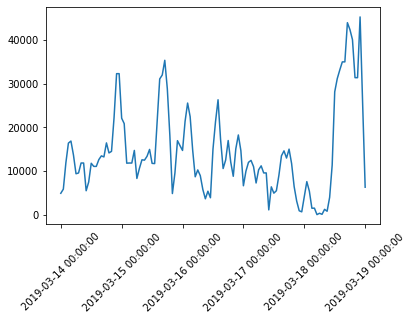

In [7]:
plt.plot(datos['GICIE301'][-1-5*24:])
plt.xticks([0,24,48,72,96,120],rotation=45)
plt.show()

In [8]:
n_periods = 5*24

In [9]:
columna = columns[5]
columna

'GICIS306'

In [134]:
def mape(forecast, actual):
    return np.mean(np.abs((forecast - actual)/actual))  # MAPE

In [133]:
def AIC_accuracy(train,test):
    fcc = []
    for i in range(1,25):
        
        data = train['Hora '+str(i)].dropna()
        model = pm.auto_arima(data.values, start_p=1, start_q=1,
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=5, max_q=5, # maximum p and q
                          m=12,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=True,   # No Seasonality
                          start_P=0, 
                          D=0, 
                          trace=False,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        #model.fit(data.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
        # Predicción
        fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
        fcc.append(fc)
    return(fcc, model)

In [112]:
    data2 = datos[['hora',columna]]
    data2[columna] = (data2[columna]) # para efectos de las tranformaciones logaritmicas(eliminar el 0)
    #data2 = data2.dropna()
    data2

,hora,GICIS306
fecha_hora,,
2019-01-01 01:00:00,1,0.0
2019-01-01 02:00:00,2,0.0
2019-01-01 03:00:00,3,0.0
2019-01-01 04:00:00,4,0.0
2019-01-01 05:00:00,5,0.0
...,...,...
2019-03-18 20:00:00,20,0.0
2019-03-18 21:00:00,21,0.0
2019-03-18 22:00:00,22,0.0


***

In [113]:
    #Se separará por hora del día, ya que cada hora se comporta diferente.
    xhr = pd.DataFrame() ; log = pd.DataFrame() ; rends = pd.DataFrame() ; rlogs = pd.DataFrame()
    ano,dia,hora= str(data2.index[1])[0:4], str(data2.index[1])[5:7] ,str(data2.index[1])[8:10]

In [114]:
    #El siguiente ciclo 'for' crea un DataFrame acomodado por horas, de cada planta de generación.
    for i in range(1,25):
        hrs = [data2.iloc[j][1] for j in range(len(data2)) if data2.iloc[j][0] == i ] #pd.Series()
        xhr['Hora '+str(i)] = hrs
    xhr

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,225.0,531.0,...,722.0,574.0,202.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,221.0,498.0,...,607.0,491.0,326.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,125.0,484.0,...,784.0,576.0,252.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,218.0,496.0,...,695.0,537.0,224.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,209.0,493.0,...,724.0,525.0,221.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,370.0,651.0,...,865.0,746.0,564.0,277.0,25.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,315.0,595.0,...,658.0,648.0,312.0,110.0,51.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,217.0,416.0,...,666.0,563.0,373.0,188.0,19.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,327.0,536.0,...,760.0,598.0,454.0,208.0,28.0,0.0,0.0,0.0,0.0,0.0


In [115]:
    #Se va a trabajar con logaritmicos, porque esta transformación no afecta el vlaor, sino solo su rango.
    #log = np.log(xhr+1)
    log = xhr
    log

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,225.0,531.0,...,722.0,574.0,202.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,221.0,498.0,...,607.0,491.0,326.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,125.0,484.0,...,784.0,576.0,252.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,218.0,496.0,...,695.0,537.0,224.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,209.0,493.0,...,724.0,525.0,221.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,370.0,651.0,...,865.0,746.0,564.0,277.0,25.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,315.0,595.0,...,658.0,648.0,312.0,110.0,51.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,217.0,416.0,...,666.0,563.0,373.0,188.0,19.0,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,327.0,536.0,...,760.0,598.0,454.0,208.0,28.0,0.0,0.0,0.0,0.0,0.0


In [116]:
    #Se le cambia el index a los DataFrame creados, por las fechas que son.
    xhr = xhr.set_index(pd.date_range(start=datos['fecha'][0],end=datos['fecha'][-1],freq='d'))
    xhr

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
2019-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,225.0,531.0,...,722.0,574.0,202.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,221.0,498.0,...,607.0,491.0,326.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,125.0,484.0,...,784.0,576.0,252.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,218.0,496.0,...,695.0,537.0,224.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,209.0,493.0,...,724.0,525.0,221.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,370.0,651.0,...,865.0,746.0,564.0,277.0,25.0,0.0,0.0,0.0,0.0,0.0
2019-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,315.0,595.0,...,658.0,648.0,312.0,110.0,51.0,0.0,0.0,0.0,0.0,0.0
2019-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,217.0,416.0,...,666.0,563.0,373.0,188.0,19.0,0.0,0.0,0.0,0.0,0.0
2019-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,327.0,536.0,...,760.0,598.0,454.0,208.0,28.0,0.0,0.0,0.0,0.0,0.0


In [117]:
    #Seleccion de y_train y y_test
    test = (xhr.iloc[-5:,:])   # INFO DE TEST
    train = log.drop(log.index[1945:]) # QUITANDO TEST PARA TRAIN

In [118]:
train, test

(    Hora 1  Hora 2  Hora 3  Hora 4  Hora 5  Hora 6  Hora 7  Hora 8  Hora 9  \
 0      0.0     0.0     0.0     0.0     0.0     0.0     0.0    19.0   225.0   
 1      0.0     0.0     0.0     0.0     0.0     0.0     0.0    24.0   221.0   
 2      0.0     0.0     0.0     0.0     0.0     0.0     0.0     9.0   125.0   
 3      0.0     0.0     0.0     0.0     0.0     0.0     0.0    20.0   218.0   
 4      0.0     0.0     0.0     0.0     0.0     0.0     0.0    23.0   209.0   
 ..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
 72     0.0     0.0     0.0     0.0     0.0     0.0     0.0    84.0   370.0   
 73     0.0     0.0     0.0     0.0     0.0     0.0     0.0    55.0   315.0   
 74     0.0     0.0     0.0     0.0     0.0     0.0     0.0    52.0   217.0   
 75     0.0     0.0     0.0     0.0     0.0     0.0     0.0    90.0   327.0   
 76     0.0     0.0     0.0     0.0     0.0     0.0     0.0   108.0   403.0   
 
     Hora 10  ...  Hora 15  Hora 16  Hora 17  Hora

In [135]:
    fcc = []

    #MODELO ARIMA
    for i in range(1,25):
        y_train = train['Hora '+str(i)].dropna()
        
        model = pm.auto_arima(y_train.values, start_p=1, start_q=1,
            test='adf',       # use adftest to find optimal 'd'
            max_p=4, max_q=4, # maximum p and q
            m=12,              # frequency of series
            d=None,           # let model determine 'd'
            seasonal=True,    # No Seasonality
            stepwise=True)   

        model.fit(y_train.values)
        #print(model)
        #model.plot_diagnostics(figsize=(7,5))
        #plt.show()
            
        # Predicción
        fc, confint = model.predict(n_periods=len(test), return_conf_int=True)
        fcc.append(fc)
        
    fc, model = AIC_accuracy(train,test)

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   77
Model:                        SARIMAX   Log Likelihood                 848.691
Date:                Mon, 09 Mar 2020   AIC                          -1693.383
Time:                        21:42:07   BIC                          -1688.695
Sample:                             0   HQIC                         -1691.508
                                 - 77                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.763e-06   6.97e-14   -5.4e+07      0.000   -3.76e-06   -3.76e-06
sigma2      2.287e-11    2.2e-10      0.104      0.917   -4.08e-10    4.53e-10
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                28.88
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.00
Prob(H) (two-sided):                  1.00   Kurtosis:                         0.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.53e+19. Standard errors may be unstable.
"""

In [151]:
fc

[array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.7

In [137]:
fcc

[array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([-3.76344271e-06, -3.76344271e-06, -3.76344271e-06, -3.76344271e-06,
        -3.76344271e-06]),
 array([83.83951296, 84.71411686, 85.58872075, 86.46332464, 87.33792853]),
 array([341.60217566, 343.46108279, 345.31998992, 347.17889704,
        349.03780417]),
 array([573.94048129, 574.83921641, 575.73795153, 576.63668665,
        577.53542177]),
 array([786.22537012, 780.94

In [138]:
    mapes = [mape(fcc[i-1], (test['Hora '+str(i)])) for i in range(1,25)]
    mapes = pd.DataFrame(mapes).dropna()
    mapes[mapes == inf] = 0
    mape_promedio = np.mean(mapes)

In [139]:
    dias = []
    for j in range(0,5):
        dias.append([([ fc[i][j] for i in range(len(fc))])][0])
    pronostico = pd.DataFrame(np.concatenate(dias))
    pronostico = pronostico.set_index(pd.date_range(pd.datetime(2019,3,14),periods=len(pronostico),freq='H'))
    pronostico.index = pronostico.index.map(str)

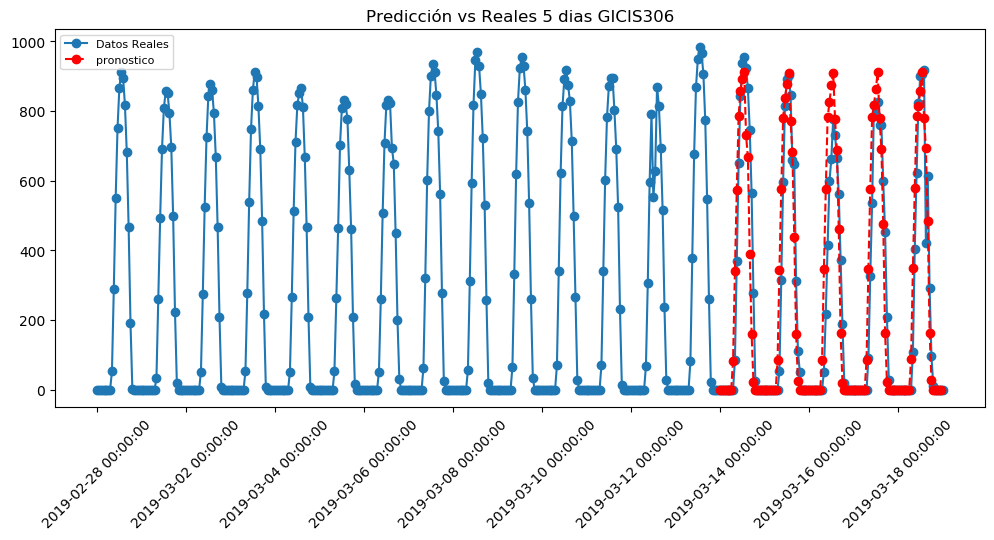

0    0.106353
dtype: float64


In [140]:
    arange_dates = []
    arange_no = []
    arange = datos[columna][-1-19*24:].index
    for i in range(0,len(arange),48):
        arange_dates.append(arange[i])
        arange_no.append(i)

    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(datos[columna][-1-19*24:], 'o-', label = 'Datos Reales')
    plt.plot(pronostico, 'o--', label='pronostico',color ='r')
    plt.title('Predicción vs Reales 5 dias '+columna)
    plt.xticks(arange_no,arange_dates,rotation = 45)
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print(mape_promedio)
    #print(fc)
    #print(model)

In [141]:
Forecasts = pd.DataFrame(fcc).dropna().T

In [142]:
Forecasts.index = test.index
Forecasts.columns = test.columns
round(Forecasts,2)

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
2019-03-14,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,83.84,341.60,573.94,...,730.46,667.01,389.48,158.75,21.64,-0.0,-0.0,-0.0,-0.0,-0.0
2019-03-15,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,84.71,343.46,574.84,...,771.78,682.24,437.62,160.08,23.98,-0.0,-0.0,-0.0,-0.0,-0.0
2019-03-16,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,85.59,345.32,575.74,...,777.83,687.65,462.26,161.40,19.96,-0.0,-0.0,-0.0,-0.0,-0.0
2019-03-17,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,86.46,347.18,576.64,...,779.22,690.52,475.45,162.72,21.98,-0.0,-0.0,-0.0,-0.0,-0.0
2019-03-18,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,87.34,349.04,577.54,...,780.00,692.72,483.08,164.04,27.19,-0.0,-0.0,-0.0,-0.0,-0.0


In [143]:
test

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
2019-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,370.0,651.0,...,865.0,746.0,564.0,277.0,25.0,0.0,0.0,0.0,0.0,0.0
2019-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,315.0,595.0,...,658.0,648.0,312.0,110.0,51.0,0.0,0.0,0.0,0.0,0.0
2019-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,217.0,416.0,...,666.0,563.0,373.0,188.0,19.0,0.0,0.0,0.0,0.0,0.0
2019-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,327.0,536.0,...,760.0,598.0,454.0,208.0,28.0,0.0,0.0,0.0,0.0,0.0
2019-03-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,403.0,622.0,...,422.0,614.0,293.0,96.0,12.0,0.0,0.0,0.0,0.0,0.0


In [144]:
new_mapes = np.abs((Forecasts - test) / test)
new_mapes[new_mapes == inf] = 0

In [145]:
new_mapes

,Hora 1,Hora 2,Hora 3,Hora 4,Hora 5,Hora 6,Hora 7,Hora 8,Hora 9,Hora 10,...,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19,Hora 20,Hora 21,Hora 22,Hora 23,Hora 24
2019-03-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001911,0.076751,0.118371,...,0.155543,0.105886,0.309435,0.426880,0.134590,0.0,0.0,0.0,0.0,0.0
2019-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.540257,0.090353,0.033884,...,0.172914,0.052836,0.402637,0.455238,0.529858,0.0,0.0,0.0,0.0,0.0
2019-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645937,0.591336,0.383985,...,0.167909,0.221407,0.239290,0.141499,0.050456,0.0,0.0,0.0,0.0,0.0
2019-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039296,0.061709,0.075815,...,0.025290,0.154711,0.047250,0.217692,0.214906,0.0,0.0,0.0,0.0,0.0
2019-03-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.191315,0.133901,0.071486,...,0.848336,0.128208,0.648752,0.708770,1.265574,0.0,0.0,0.0,0.0,0.0


In [146]:
new_mapes[[ 'Hora 8', 'Hora 9', 'Hora 10',
                           'Hora 11', 'Hora 12','Hora 13', 'Hora 14', 'Hora 15',
                          'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19']]

,Hora 8,Hora 9,Hora 10,Hora 11,Hora 12,Hora 13,Hora 14,Hora 15,Hora 16,Hora 17,Hora 18,Hora 19
2019-03-14,0.001911,0.076751,0.118371,0.068453,0.084047,0.065999,0.011037,0.155543,0.105886,0.309435,0.426880,0.134590
2019-03-15,0.540257,0.090353,0.033884,0.041786,0.062268,0.028368,0.074409,0.172914,0.052836,0.402637,0.455238,0.529858
2019-03-16,0.645937,0.591336,0.383985,0.306998,0.244050,0.124412,0.243178,0.167909,0.221407,0.239290,0.141499,0.050456
2019-03-17,0.039296,0.061709,0.075815,0.042415,0.038800,0.046766,0.198590,0.025290,0.154711,0.047250,0.217692,0.214906
2019-03-18,0.191315,0.133901,0.071486,0.047062,0.093167,0.053264,0.005074,0.848336,0.128208,0.648752,0.708770,1.265574


In [147]:
np.mean(new_mapes)

Hora 1     0.000000
Hora 2     0.000000
Hora 3     0.000000
Hora 4     0.000000
Hora 5     0.000000
Hora 6     0.000000
Hora 7     0.000000
Hora 8     0.283743
Hora 9     0.190810
Hora 10    0.136708
Hora 11    0.101343
Hora 12    0.104466
Hora 13    0.063762
Hora 14    0.106458
Hora 15    0.273998
Hora 16    0.132610
Hora 17    0.329473
Hora 18    0.390016
Hora 19    0.439077
Hora 20    0.000000
Hora 21    0.000000
Hora 22    0.000000
Hora 23    0.000000
Hora 24    0.000000
dtype: float64

In [148]:
np.mean(np.mean(new_mapes[['Hora 8', 'Hora 9', 'Hora 10',
                           'Hora 11', 'Hora 12','Hora 13', 'Hora 14', 'Hora 15',
                          'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19']]))

0.21270533327480043